In [1]:
%matplotlib inline
import sigpy as sp
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams["savefig.bbox"] = 'tight'

In [2]:

magn_thresh = 0.00005
error_scale = 2
maxt1 = 2500
maxt2 = 150

In [3]:
cases = ['../data/testing/case002', \
         '../data/testing/case003', \
         '../data/testing/case004']
T1 = np.zeros((256,256,256,3))
T2 = np.zeros((256,256,256,3))
T1w = [1,2,3]
T2w = [1,2,3]
msk = np.zeros((256,256,256,3))
for ii in range(3):
    T1[...,ii] = np.load("%s/T1_refine_2min_iters_20.npy" % cases[ii], mmap_mode="r")
    T2[...,ii] = np.load("%s/T2_refine_2min_iters_20.npy" % cases[ii], mmap_mode="r")
    if ii==0:
        T1w[ii] = Image.open(f'{cases[ii]}/002_AX BRAVO.tif') # copied from clinical record
        T2w[ii] = Image.open(f'{cases[ii]}/002_AX T2.tif') # copied from clinical record
    elif ii==1:
        T1w[ii] = Image.open(f'{cases[ii]}/003_AX IR SPGR.tif') # copied from clinical record
        T2w[ii] = Image.open(f'{cases[ii]}/003_AX T2.tif') # copied from clinical record
    elif ii==2:
        T1w[ii] = Image.open(f'{cases[ii]}/004_AX T1 CUBE pre.tif') # copied from clinical record
        T2w[ii] = Image.open(f'{cases[ii]}/004_AX T2.tif') # copied from clinical record

    x = np.load("%s/refine_2min_iters_20.npy" % cases[ii], mmap_mode="r")
    x = sp.fft(x,axes=(3,))
    x = x/np.linalg.norm(x[..., 0].ravel(), ord=np.inf)
    msk[...,ii] = ((np.abs(x[..., 0])/np.linalg.norm(x[..., 0])) > magn_thresh)

    

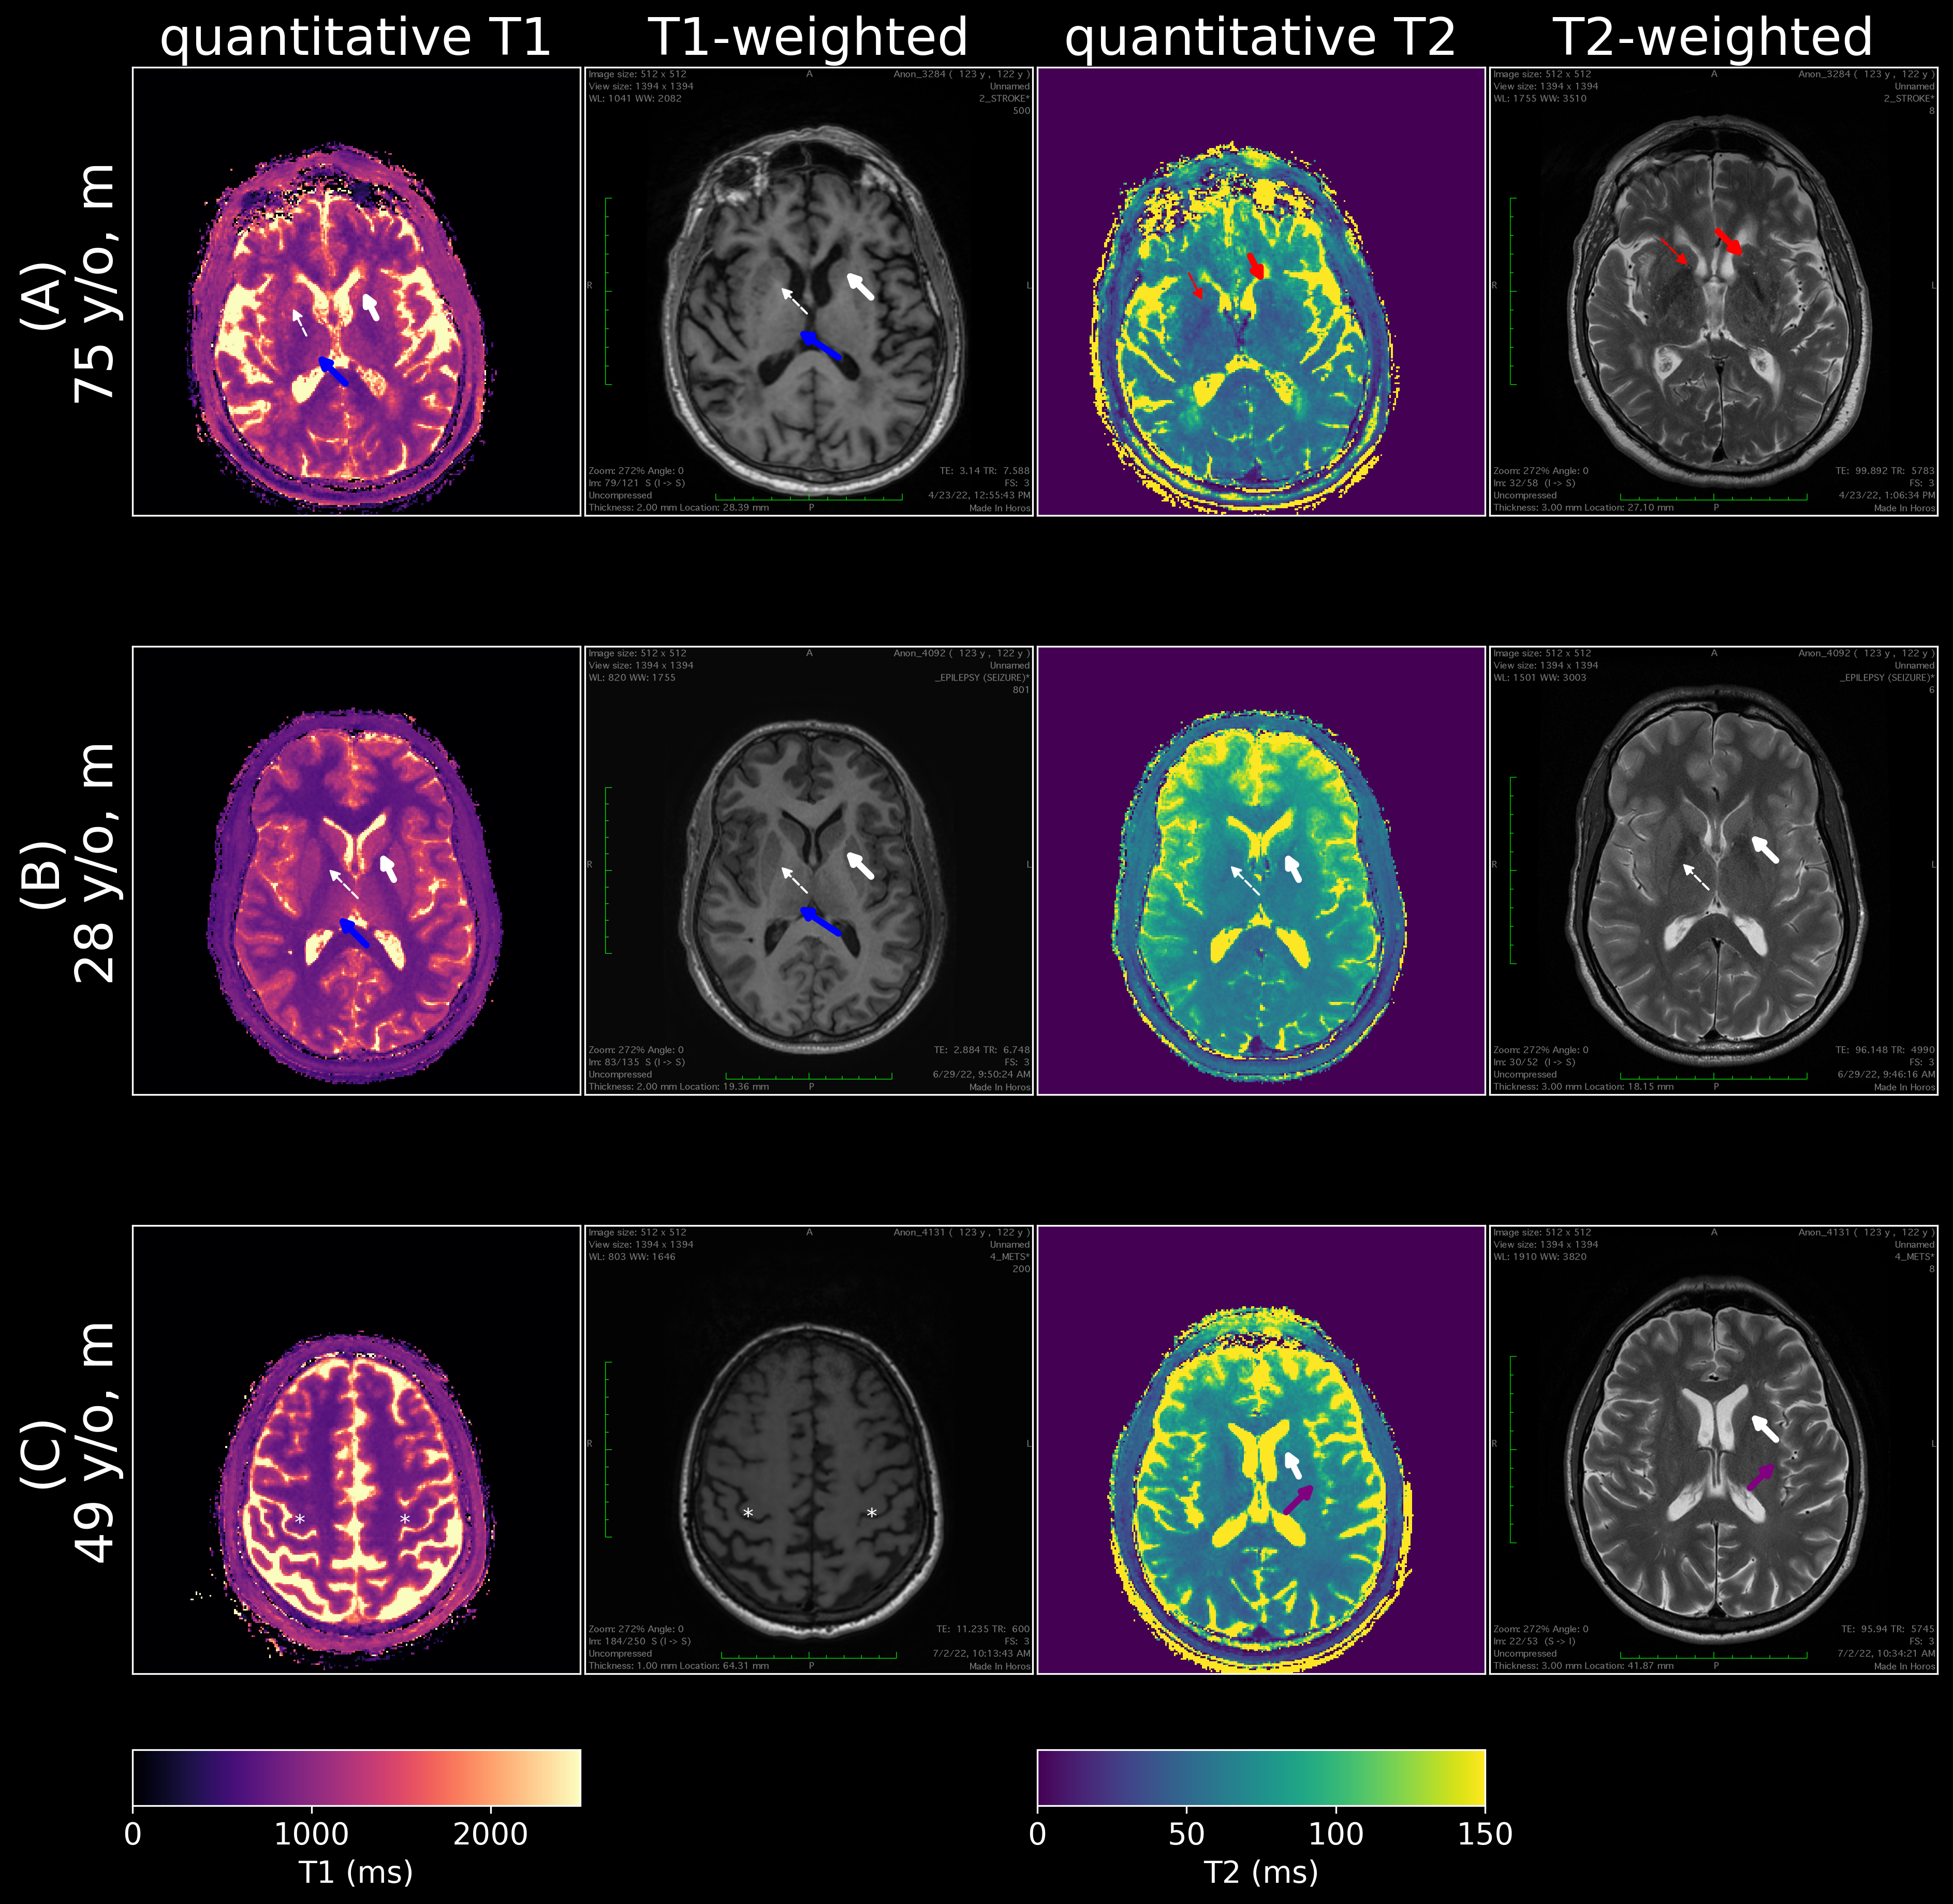

In [4]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15),gridspec_kw={'height_ratios': [1,1,1,0.1]},dpi=300)

T1_slices=[154,152,190]
T2_slices=[152,153,164]

for k in range(3):
    im1 = axs[k][0].imshow(((np.fliplr(np.rot90(msk))*np.transpose(T1[::-1,::-1,:,:],(1,0,2,3)))[:,:,T1_slices[k],k]) , cmap="magma", vmin=0, vmax=maxt1)
    axs[k][1].imshow(np.array(T1w[k]))
    im2 = axs[k][2].imshow(((np.fliplr(np.rot90(msk))*np.transpose(T2[::-1,::-1,:,:],(1,0,2,3)))[:,:,T2_slices[k],k]) , cmap="viridis", vmin=0, vmax=maxt2)
    axs[k][3].imshow(np.array(T2w[k]))

#caudate head
axs[0][0].annotate("", xy=(130,125), xytext=(140,145), arrowprops=dict(arrowstyle="-|>",color="w",linewidth=3))
axs[0][1].annotate("", xy=(5*160,5*125), xytext=(5*180,5*145), arrowprops=dict(arrowstyle="-|>",color="w",linewidth=3))
axs[1][0].annotate("", xy=(140,115), xytext=(150,135), arrowprops=dict(arrowstyle="-|>",color="w",linewidth=3))
axs[1][1].annotate("", xy=(5*160,5*125), xytext=(5*180,5*145), arrowprops=dict(arrowstyle="-|>",color="w",linewidth=3))
axs[1][2].annotate("", xy=(140,115), xytext=(150,135), arrowprops=dict(arrowstyle="-|>",color="w",linewidth=3))
axs[1][3].annotate("", xy=(5*160,5*115), xytext=(5*180,5*135), arrowprops=dict(arrowstyle="-|>",color="w",linewidth=3))
axs[2][2].annotate("", xy=(140,125), xytext=(150,145), arrowprops=dict(arrowstyle="-|>",color="w",linewidth=3))
axs[2][3].annotate("", xy=(5*160,5*115), xytext=(5*180,5*135), arrowprops=dict(arrowstyle="-|>",color="w",linewidth=3))


#putamen
axs[0][0].annotate("", xy=(90,135), xytext=(100,155), arrowprops=dict(arrowstyle="-|>",color="w",linewidth=1,linestyle='--'))
axs[0][1].annotate("", xy=(5*120,5*135), xytext=(5*140,5*155), arrowprops=dict(arrowstyle="-|>",color="w",linewidth=1,linestyle='--'))
axs[1][0].annotate("", xy=(110,125), xytext=(130,145), arrowprops=dict(arrowstyle="-|>",color="w",linewidth=1,linestyle='--'))
axs[1][1].annotate("", xy=(5*120,5*135), xytext=(5*140,5*155), arrowprops=dict(arrowstyle="-|>",color="w",linewidth=1,linestyle='--'))
axs[1][2].annotate("", xy=(108,123), xytext=(128,143), arrowprops=dict(arrowstyle="-|>",color="w",linewidth=1,linestyle='--'))
axs[1][3].annotate("", xy=(5*118,5*133), xytext=(5*138,5*153), arrowprops=dict(arrowstyle="-|>",color="w",linewidth=1,linestyle='--'))

#thalami
axs[0][0].annotate("", xy=(103,162), xytext=(123,182), arrowprops=dict(arrowstyle="-|>",color="b",linewidth=3,linestyle='-'))
axs[0][1].annotate("", xy=(5*130,5*162), xytext=(5*160,5*182), arrowprops=dict(arrowstyle="-|>",color="b",linewidth=3,linestyle='-'))
axs[1][0].annotate("", xy=(115,152), xytext=(135,172), arrowprops=dict(arrowstyle="-|>",color="b",linewidth=3,linestyle='-'))
axs[1][1].annotate("", xy=(5*130,5*160), xytext=(5*160,5*180), arrowprops=dict(arrowstyle="-|>",color="b",linewidth=3,linestyle='-'))

#Striatum
axs[0][2].annotate("", xy=(130,125), xytext=(120,105), arrowprops=dict(arrowstyle="-|>",color="r",linewidth=3))
axs[0][3].annotate("", xy=(5*160,5*120), xytext=(5*140,5*100), arrowprops=dict(arrowstyle="-|>",color="r",linewidth=3))

# globus pallidus
axs[0][2].annotate("", xy=(95,135), xytext=(85,115), arrowprops=dict(arrowstyle="-|>",color="r",linestyle='--',linewidth=1))
axs[0][3].annotate("", xy=(5*125,5*125), xytext=(5*105,5*105), arrowprops=dict(arrowstyle="-|>",color="r",linestyle='--',linewidth=1))

#insula
axs[2][2].annotate("", xy=(160,145), xytext=(140,165), arrowprops=dict(arrowstyle="-|>",color="purple",linewidth=3))
axs[2][3].annotate("", xy=(5*180,5*145), xytext=(5*160,5*165), arrowprops=dict(arrowstyle="-|>",color="purple",linewidth=3))

# hand knob
axs[2][0].annotate("*", xy=(92,173), xytext=(92,173),color='w')
axs[2][0].annotate("*", xy=(92+60,173), xytext=(92+60,173),color='w')
axs[2][1].annotate("*", xy=(5*98,5*185), xytext=(5*98,5*185),color='w')
axs[2][1].annotate("*", xy=(5*(115+60),5*185), xytext=(5*(115+60),5*185),color='w')


axs[0][0].set_ylabel('(A)\n 75 y/o, m',fontsize=24)
axs[1][0].set_ylabel('(B)\n 28 y/o, m',fontsize=24)
axs[2][0].set_ylabel('(C)\n 49 y/o, m',fontsize=24)

axs[0][0].set_title('quantitative T1',fontsize=24)
axs[0][1].set_title('T1-weighted',fontsize=24)
axs[0][2].set_title('quantitative T2',fontsize=24)
axs[0][3].set_title('T2-weighted',fontsize=24)

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

cbar1 = plt.colorbar(im1, cax=axs[3][0],shrink=0.7,orientation='horizontal')
cbar2 = plt.colorbar(im2, cax=axs[3][2],shrink=0.7,orientation='horizontal')

cbar1.ax.tick_params(labelsize=14)
cbar2.ax.tick_params(labelsize=14)

cbar1.set_label('T1 (ms)',fontsize=14)
cbar2.set_label('T2 (ms)',fontsize=14)


axs[3][1].remove()
axs[3][3].remove()
plt.subplots_adjust(wspace=0.01, hspace=0.05)
plt.savefig('10_patients.png')